In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
import pandas as pd
import os
import re
from PIL import Image
import shutil
import xml.etree.ElementTree as et
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
                        
import tensorflow.keras as keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import * 
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split
import seaborn as sns


model = tf.keras.models.load_model('/Users/ksjljk1030/Bogeo_AI/model/Pill_image_model_2.h5')
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

In [9]:
def test(img_dir):
    image = Image.open(img_dir)
    image = image.resize((224, 224))
    image = np.array(image)
    image = image/255.
    
    plt.imshow(image)
    plt.show()
    
    image = np.reshape(image, (1, 224, 224, 3))
    
    prediction = model.predict(image)
    prediction.shape
    pred_class = np.argmax(prediction, axis=-1)
    pred_class
    
    print("예측: ", class_list[int(pred_class)])

In [11]:
data_dir = '/Users/ksjljk1030/drug_image3/'
image_dir = os.path.join(data_dir, 'real_image2')
print(image_dir)
bbox_dir = os.path.join(data_dir, 'annotation2')
print(bbox_dir)
#aug_data = = os.path.join(data_dir, 'imgaug')
#print(aug_data)

/Users/ksjljk1030/drug_image3/real_image2
/Users/ksjljk1030/drug_image3/annotation2


In [12]:
image_files = [fname for fname in os.listdir(image_dir) if os.path.splitext(fname)[-1] == '.jpg']
print(len(image_files))
image_files[:5]

30000


['가나릴정.jpg',
 '가나릴정.jpg_1.jpg',
 '가나릴정.jpg_2.jpg',
 '가나릴정.jpg_3.jpg',
 '가나릴정.jpg_4.jpg']

In [13]:
class_list = set()
for image_file in image_files:
    file_name = re.split('[/,(,). :, _]',image_file)[-2]
    class_name = re.split('[/,(,). :, _]',image_file)[-2]
    if class_name =='1' or class_name =='2' or class_name =='3' or class_name =='4' or class_name =='5' or class_name =='6' or class_name =='7' or class_name =='8' or class_name =='9':
        continue
    class_list.add(class_name)
class_list = list(class_list)
print(len(class_list))
#print(class_list)

3000


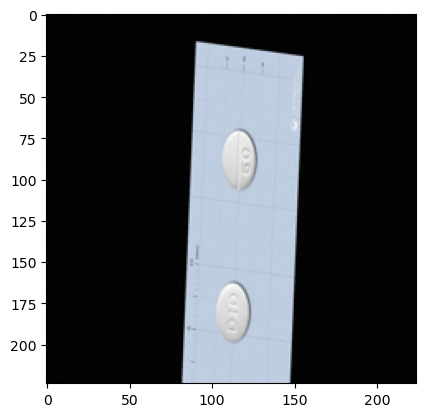

예측:  러지펜정


In [40]:
#test('/Users/ksjljk1030/sample/8.jpg')
test('/Users/ksjljk1030/drug_image3/validation/러지피드정.jpg_8.jpg')